<a href="https://colab.research.google.com/github/camila-haika-zumach/camila-haika-zumach/blob/main/Portfolio_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uma das áreas em que a ciência de dados pode ser aplicada é na saúde, e um tema que está em foco é a pandemia do COVID-19. 
  
Uma das formas que se pode utilizar esses dados é para entender óbitos através do tempo como uma forma de prever a tendência futura e auxiliar em políticas públicas, por exemplo.

Sabendo de tudo isso, o epidemiologista chefe do Brasil te pediu pra analisar os dados de óbitos nacionais da semana 25 a 35 e quer saber quando que o número de mortes vai ser inferior a 100 óbitos por semana para saber quando toma a decisão de abrir as completamente as cidades.

Como essa decisão é importante, ele precisa de uma análise dos dados e como conhecedor da área da saúde, ele te deu uma dica: uma regressão linear pode funcionar, mas epidemias tem comportamentos exponenciais do tipo A*exp(b*t). 

Então você deve plotar os dados de semana por óbito e semana por ln(obito) e observar se tem alguma diferença entre os gráficos. Após isso, você deve fazer uma regressão de semana por obito e semana por ln(obito) e através das métricas de R², erro quadrático médio, gráficos dos resíduos, normalidade dos resíduos (teste de Shapiro) e homocedasticidade (teste de Breusch-Pagan), você deve dizer escolher o modelo que vai responder a pergunta do epidemiologista.

In [ ]:
# aqui vai as bibliotecas que você vai usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm

O dataset já está aqui e foi retirado do https://covid.saude.gov.br/ . Ele corresponde ao numero de óbitos por semana da semana 25 até a semana 35.

In [ ]:
semana = np.arange(25,36)
obitos = np.array([11935, 10852, 9306, 8373, 8182, 6922, 6382,6032,5421,4801,4352])
df=pd.DataFrame({'Semana':semana, 'Obitos':obitos}) #coloquei num dataframe pra ficar mais facil de plotar os dados
semana=semana.reshape(-1, 1) #coloquei aqui pra poder treinar o modelo mais facilmente

Visualização dos dados - tendência linear

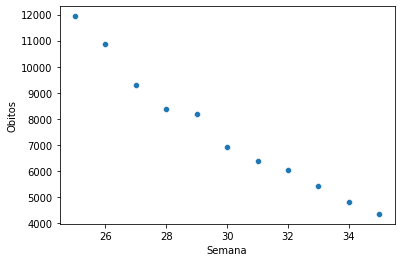

In [ ]:
sns.scatterplot(data=df,x='Semana',y='Obitos')

Visualização dos dados - tendência do logaritmos dos óbitos


---



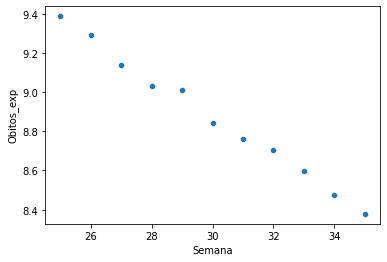

In [ ]:
# Para analisar a tendencia exponencial com uma reta, basta aplicar o logaritmo natural na variável a ser predita

df['Obitos_exp']=np.log(df['Obitos'])
sns.scatterplot(data=df,x='Semana',y='Obitos_exp')

Vamos fazer uma coisa quando se tem poucos dados: não vamos fazer o split dos dados mas lembre-se de olhar bem as estatísticas e métricas para não ter overfitting!

Regressão linear

In [ ]:
# a gente vai usar a biblioteca statsmodels porque ela nos dá todas as estatísticas sem precisar de esforço mas voce pode utilizar o que voce quiser

X_linear=semana
X_linear = sm.add_constant(X_linear) 
y_linear=df['Obitos']
modelo_linear = sm.OLS(y_linear,X_linear)
resultado_linear = modelo_linear.fit()
print(print(resultado_linear.summary()))

                            OLS Regression Results                            
Dep. Variable:                 Obitos   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     251.6
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           6.94e-08
Time:                        02:06:41   Log-Likelihood:                -82.472
No. Observations:                  11   AIC:                             168.9
Df Residuals:                       9   BIC:                             169.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.939e+04   1387.603     21.183      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


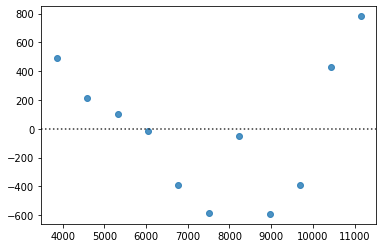

In [ ]:
predicao_linear= resultado_linear.predict(X_linear)
residuos_linear=resultado_linear.resid
sns.residplot(y=residuos_linear,x=predicao_linear)

# O que você acha desses resíduos? Eles são tem a variância constante no intervalo?

In [ ]:
#Aqui é o erro quadrático médio

print(sm.tools.eval_measures.rmse(y_linear, predicao_linear))

436.38104510728414


In [ ]:
#vamos fazer o teste de normalidade dos resíduos

stat, p = sp.stats.shapiro(residuos_linear)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#o p valor é maior que 5%, então a distribuição é normal

Statistics=0.948, p=0.623


In [ ]:
# aqui tem o teste de homocedasticidade 

sm.stats.het_breuschpagan(residuos_linear,resultado_linear.model.exog)

#o pvalor está na segunda linha e como é maior que 5%, os resíduos tem variancia inconstante no intervalo

(3.156545059505461,
 0.07562307126980287,
 3.6219887474432197,
 0.0894360907440582)

Regressão linear de Ln(y) = a*x+b-> Observe que se você a curva segue y= a*exp(b*x), a equação fica ln(y) = ln(a)+b*x se colocar ln dos dois lados

In [ ]:
X_exp=semana
X_exp = sm.add_constant(X_exp) 
y_exp=df['Obitos_exp']
modelo_exp= sm.OLS(y_exp,X_exp)
resultado_exp = modelo_exp.fit()
print(print(resultado_exp.summary()))

                            OLS Regression Results                            
Dep. Variable:             Obitos_exp   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1335.
Date:                Sun, 05 Sep 2021   Prob (F-statistic):           4.27e-11
Time:                        02:08:50   Log-Likelihood:                 24.721
No. Observations:                  11   AIC:                            -45.44
Df Residuals:                       9   BIC:                            -44.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8288      0.081    145.479      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


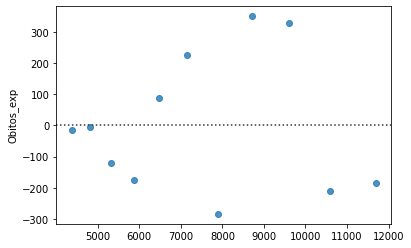

In [ ]:
predicao_exp= resultado_exp.predict(X_exp) #aqui a gente precisa pegar só o vetor de semanas para o programa entender (esse vetor tem o const tb)

residuos_exp=np.exp(predicao_exp)-np.exp(np.transpose(y_exp)) # aqui a gente volta a usar o numero de obitos ao inves do ln(obitos)
sns.residplot(y=residuos_exp,x=np.exp(predicao_exp))

# o que você acha desses resíduos? Eles são tem a variância constante no intervalo e estão distribuidos normalmente?

In [ ]:
#Aqui é o erro quadrático médio

print(sm.tools.eval_measures.rmse(np.exp(y_exp), np.exp(predicao_exp)))

214.0723944951227


In [ ]:
#vamos fazer o teste de normalidade dos resíduos
stat, p = sp.stats.shapiro(residuos_exp)
print('Statistics=%.3f, p=%.3f' % (stat, p))
#o p valor é maior que 5%, então a distribuição é normal

Statistics=0.928, p=0.388


In [ ]:
# aqui tem o teste de homocedasticidade

sm.stats.het_breuschpagan(residuos_exp,resultado_exp.model.exog)

#o pvalor está na segunda linha e como é menor que 5%, os resíduos tem variancia constante no intervalo

(6.794328498726222,
 0.009144791323019359,
 14.539641641059157,
 0.00413349512514374)

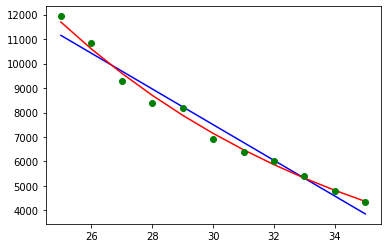

In [ ]:
# comparação visual entre os modelos
# qual voce acha que ajustou melhor?

plt.plot(df['Semana'], predicao_linear, 'b', df['Semana'], np.exp(predicao_exp), 'r',df['Semana'],df['Obitos'],'go')

O R² do linear é 0.965 e do modelo exponencial é de 0.993. O RMSE linear é 436.38 e do exponencial 214.07. Apesar dos dois modelos terem resíduos normais, apenas o exponencial tem homocedasticidade.

O modelo exponencial tem melhores métricas em comparação ao modelo linear e contextualizando com os dados, o modelo exponencial ajustado tende a zero no tempo infinito e o linear não, perdendo o sentido físico do dado. 

Respondendo ao epidemiologista, ln(obitos = 100)= -0.0985*semanas + 11.83 e isolando as semanas, temos que a semana com menos de 100 mortes será a partir da semana 73 ou seja, daqui a aproximadamente 9 meses.

